<a href="https://colab.research.google.com/github/bikash119/bikash119/blob/main/learn_pytorch_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Custom Dataset

In [1]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f'{image_path} directory exists')
else:
  print(f'Did not find {image_path} directory, creating one...')
  image_path.mkdir(parents=True,exist_ok=True)

  #### Download pizza, steak, sushi
  with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data....")
    f.write(request.content)
  
  with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip",'r') as zip_ref:
    print("Unzipping data....")
    zip_ref.extractall(image_path)


data/pizza_steak_sushi directory exists


### Helper function to walk through directory and list down its contents

In [2]:
import os

def walk_through(dir_path):
  """
    Walks through a directory and prints the number of files / directories in the directory

    Args:
      dir_path (str or pathlib.Path): target directory

    Returns:
      A print of:
        Number of subdirectories in dir_path
        Number of images in each subdirectory
        name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

In [3]:
walk_through(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/train.
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza.
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak.
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/test.
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza.
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak.
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi.


### Visualize the image

 Random image path: data/pizza_steak_sushi/train/pizza/741883.jpg
 Image class: pizza
 Image height: 512
 Image width: 512


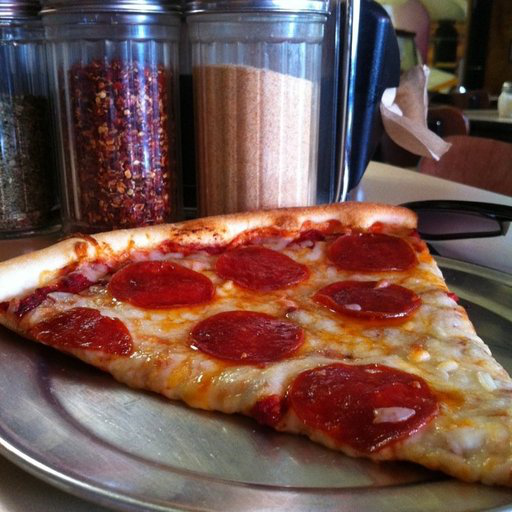

In [4]:
import random
from PIL import Image

### Set Seed
random.seed(42)

### Get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

### Get random image path
random_image_path = random.choice(image_path_list)

### Get image class
image_class = random_image_path.parent.stem

### Get image
img = Image.open(random_image_path)

### Print metadata

print(f' Random image path: {random_image_path}')
print(f' Image class: {image_class}')
print(f' Image height: {img.height}')
print(f' Image width: {img.width}')
img

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Transforming data with `torchvision.transforms`

In [6]:
# Write transforms for image

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=.05),
    transforms.ToTensor()
])

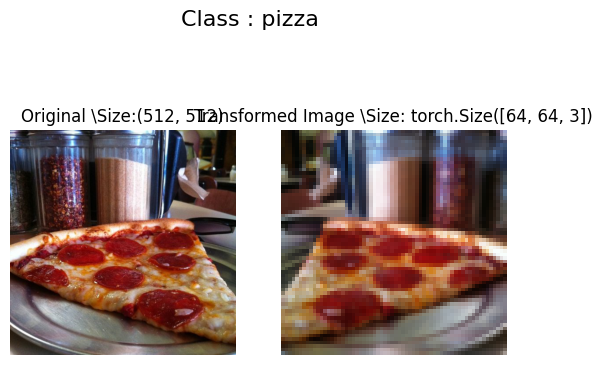

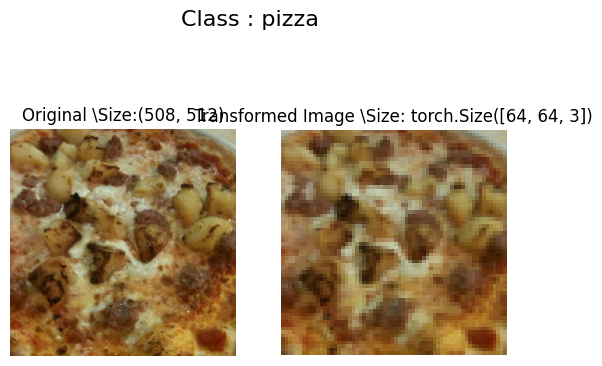

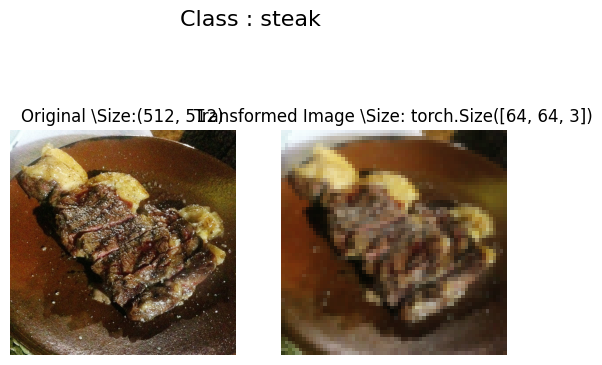

In [7]:
import matplotlib.pyplot as plt
def plot_transformed_images(image_path,transform,n=3,seed=42):
  """
    Plot a series of random images from image_path

    Args:
      image_path (List): List of target image paths
      transform (torchvision.transforms) : Transforms to apply to images.
      n(int, optional): Number of images to plot. Default 3
      seed(int, optional) : Random seed for the random generator
  """

  random.seed(seed)
  random_image_paths = random.sample(image_path,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original \Size:{f.size}')
      ax[0].axis('off')

      #### Transformed Image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed Image \Size: {transformed_image.shape}')
      ax[1].axis('off')

      fig.suptitle(f'Class : {image_path.parent.stem}',fontsize=16)


plot_transformed_images(image_path_list,data_transform)


#### Set up train and test dir

In [8]:
train_dir = image_path/ "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Turn the image data into pytorch understandable `Dataset`
### Using `torchvision.dataset.ImageFolder`

In [9]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f'Train data: {train_data} \n Test data: {test_data}')

Train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.05)
               ToTensor()
           ) 
 Test data: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.05)
               ToTensor()
           )


### Some checks to see if the dataset created is fine

In [10]:
train_data.classes

['pizza', 'steak', 'sushi']

In [11]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [12]:
len(train_data),len(test_data)

(225, 75)

### Create `DataLoader` from `Dataset`

In [13]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fce3986d1b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fce377836d0>)

In [14]:
img,lbl = next(iter(train_dataloader))
print(f' Image Shape : {img.shape} -> [ batch_size,channel, height, width]')
print(f' Label Shape : {lbl.shape}')

 Image Shape : torch.Size([1, 3, 64, 64]) -> [ batch_size,channel, height, width]
 Label Shape : torch.Size([1])


In [15]:

from typing import Tuple, Dict, List
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
  """
    A function to read a directory and 
    a) return the name of the subdirectories as classes
    b) a dictionary with name of the class and corresponding index in the list

    The function assumes the directory structure `directory` is in standard classification format

    Args:
      directory(string): The target directory to be scanned.

    Returns: 
      A Tuple with 
        first element as list of string 
      and 
        second element as a dicitonary of ( class_name(string), index(int) )
  """

  classes = [entry.name for entry in os.scandir(train_dir) if entry.is_dir()]

  if classes is None:
    raise FileNotFoundError(f"Couldn't find any classes in {directory} or the directory doesn't have standard classification structure")

  class_to_idx = { ab: i for i,ab in enumerate(classes)}

  return classes,class_to_idx


In [16]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create Custom Dataset with ImageFolder

In [17]:
from torch.utils.data import Dataset
import pathlib


class CustomImageFolderDataset(Dataset):

  def __init__(self,targ_dir:str, transform=None) -> None:
    
    ## Create class attributes
    ## Get all image paths
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))

    ## Setup Transforms
    self.transform = transform

    self.classes, self.class_to_idx = find_classes(targ_dir)

  
  def load_img(self,idx:int) -> Image.Image:
    "Opens an image given a index via a path and returns it"

    img_path = self.paths[idx]
    return Image.open(img_path)

  
  def __len__(self) -> int:
    "Returns total number of samples"
    return len(self.paths)

  def __getitem__(self,idx:int) -> Tuple[torch.Tensor,int]:
    "Returns one sample of data and label(X,y)"

    ## Load the image
    img = self.load_img(idx)
    class_name = self.paths[idx].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img),class_idx
    else:
      return img,class_idx


### Add some transforms 

In [18]:
train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

### No augmentation, only resize
test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
    ])

#### Lets convert the data in the folder to pytorch dataset using our `CustomImageFolderDataset` class

In [19]:
train_dataset_custom = CustomImageFolderDataset(targ_dir = train_dir,
                                         transform= train_transforms)

test_dataset_custom = CustomImageFolderDataset(targ_dir= test_dir,
                                        transform=test_transforms)

train_dataset_custom, test_dataset_custom

(<__main__.CustomImageFolderDataset at 0x7fce377a93f0>,
 <__main__.CustomImageFolderDataset at 0x7fce377aa170>)

In [20]:
len(train_dataset_custom), len(test_dataset_custom)

(225, 75)

In [21]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          seed: int = None):
  
  """
    A function to take datasets and display random images from the dataset.

    Args:
      dataset(torch.utils.data.Dataset) : Target image dataset to be used to display images.
      classes(List[str]) : List of classes in our dataset.
      n (int): Number of images to be displayed. Max = 10
      seed (int) : Random seed to be used
  """

  if n > 10:
    n = 10

  if seed:
    random.seed(42)

  ## Get random sample indexes
  print(f'Lenth of dataset: {len(dataset)}')
  random_sample_idx = random.sample(range(len(dataset)),k=n)

  ## Setup the plot
  plt.figure(figsize=(16,8))

  ## Loop through the indexes and display the images at idx
  for i , targ_sample in enumerate(random_sample_idx):
    targ_img , targ_idx = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_img_adjust = targ_img.permute(1,2,0)

    ## plot the samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_img_adjust)
    plt.axis("off")
    if classes:
      title = f"class {classes[targ_idx]}"
      title = title + f"\nshape: {targ_img_adjust.shape}"

    plt.title(title)


Lenth of dataset: 225


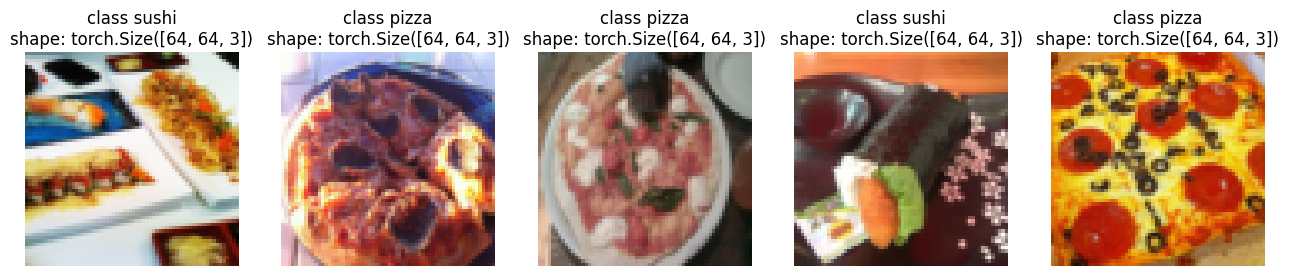

In [22]:
class_names = train_data.classes
display_random_images(dataset=train_data,classes=class_names,n=5,seed=42)

Lenth of dataset: 225


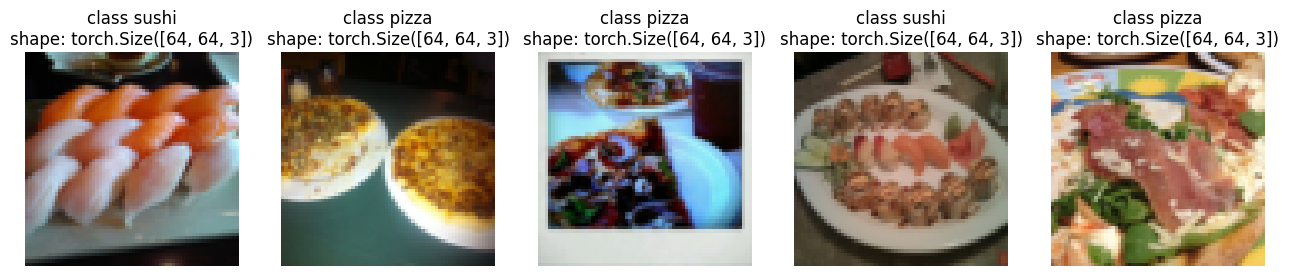

In [23]:
custom_class_names = train_dataset_custom.classes
display_random_images(dataset=train_dataset_custom,classes=class_names,n=5,seed=42)

### Turn custom dataset to pytorch DataLoader

In [24]:
train_dataloader_custom =  DataLoader(dataset=train_dataset_custom,
                                      batch_size=1,
                                      shuffle=True,
                                      num_workers=1)

test_dataloader_custom = DataLoader(dataset=test_dataset_custom,
                                    batch_size=1,
                                    shuffle=False,
                                    num_workers=1)

train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fce399c28f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fce377803d0>)

### Model 0 with no transforms , only resize

In [25]:
### define transforms
no_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])
NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 32
### Create Datasets
train_dataset_no_transform = CustomImageFolderDataset(targ_dir=train_dir,
                                                transform=no_transform)
test_dataset_no_transform = CustomImageFolderDataset(targ_dir=test_dir,
                                               transform=no_transform)

### Verfy if the datasets are created properly
print(f' Length of train dataset: {len(train_dataset_no_transform)}')
print(f' Length of test dataset: {len(test_dataset_no_transform)}')
### Create Dataloader

train_dataloader_no_tranform = DataLoader(dataset=train_dataset_no_transform,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=NUM_WORKERS)
test_dataloader_no_tranform = DataLoader(dataset=test_dataset_no_transform,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         num_workers=NUM_WORKERS)

train_dataloader_no_tranform,test_dataloader_no_tranform

 Length of train dataset: 225
 Length of test dataset: 75


(<torch.utils.data.dataloader.DataLoader at 0x7fce39b0bfd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fce377a9660>)

In [26]:
# Get image and label from custom DataLoader
img_no_tranform_from_dataloader, label_no_tranform_from_dataloader = next(iter(train_dataloader_no_tranform))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_no_tranform_from_dataloader.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_no_tranform_from_dataloader.shape}")


Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [27]:
img_no_tranform , label_no_transform= train_dataset_no_transform[0][0], train_dataset_no_transform[0][1]
print(f"Image shape: {img_no_tranform.shape} -> [color_channels, height, width]")
print(f"Label shape: {label_no_transform}")

Image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Label shape: 0


In [28]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [29]:

class TinyVGG(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()

    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
                
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )

  def forward(self,x) -> torch.Tensor:
    return self.classifier(self.block_2(self.block_1(x)))


torch.manual_seed(42)
model_v0 = TinyVGG(input_shape=3,
                   hidden_units=10, 
                   output_shape=len(train_dataset_no_transform.classes)).to(device)
model_v0                   

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## A good way to test the model is
`do a forward pass on single piece of data`

In [30]:
model_v0.eval()
with torch.inference_mode():
  pred = model_v0(img_no_tranform_from_dataloader[0].unsqueeze(dim=0).to(device))

print(f' Output Predictions: {pred}')
print(f' Output Prediction probabilities : {torch.softmax(pred,dim=1)}')
print(f' Output Prediction label : {torch.argmax(torch.softmax(pred,dim=1),dim=1)}')
print(f' Label : {label_no_tranform_from_dataloader[0]}')

 Output Predictions: tensor([[0.0653, 0.0615, 0.0376]], device='cuda:0')
 Output Prediction probabilities : tensor([[0.3368, 0.3355, 0.3276]], device='cuda:0')
 Output Prediction label : tensor([0], device='cuda:0')
 Label : 2


### Lets use `torchinfo` to have better summary of our model

In [31]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary

summary(model_v0,input_size=[1,3,64,64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [32]:
def train_step(model: nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:nn.Module,
               optimizer:torch.optim.Optimizer,
               device: torch.device):
  
  ## put the model in train mode
  ## train the model
  model.train()

  ## Setup the train_loss and train_acc
  train_loss , train_acc = 0,0
  
  for batch,(X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)

   
    ## Forward pass
    pred_logits = model(X)
    pred_class = torch.argmax(torch.softmax(pred_logits,dim=1),dim=1)

    ## loss
    loss = loss_fn(pred_logits,y)
    train_loss += loss.item()

    ## zero grad
    optimizer.zero_grad()

    ## BackProp
    loss.backward()

    ## update parameters
    optimizer.step()

    ## Calculate accuracy
    train_acc += (pred_class == y).sum().item()/ len(pred_logits)
  
  ## Get Avg loss and Avg accuracy
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc




In [33]:
def test_step(model:nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:nn.Module,
              device: torch.device):
  
  ## put the model in eval mode
  model.eval()

  ## Setup test_loss and test_acc
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    
    for batch,(X,y) in enumerate(dataloader):
      X,y = X.to(device),y.to(device)
      
      ## forward pass
      pred_logits = model(X)

      ## Calculate Loss
      loss = loss_fn(pred_logits,y)
      test_loss += loss.item()
      
      ## Calculate Acc
      pred_labels = torch.argmax(torch.softmax(pred_logits,dim=1),dim=1)
      test_acc += (pred_labels == y).sum().item()/len(pred_logits)

    ## Get avg loss and acc
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return test_loss , test_acc



### Create a train function to pack the `train_step` and `test_step` into a single function

In [34]:
from tqdm.auto import tqdm

def train(model: nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: nn.Module,
          optimizer: torch.optim.Optimizer,
          device: torch.device,
          epochs:int = 5,
          random_seed:int = 42):
  
  ## Create empty results dictionary
  results = {
      "train_loss" : [],
      "test_loss"  : [],
      "train_acc"  : [],
      "test_acc"   : []
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    
    print(f'epoch = {epoch+1} |' 
          f'train_loss = {train_loss:.4f} |'
          f'train_acc = {train_acc:.4f} |'
          f'test_loss = {test_loss:.4f}|'
          f'test_acc = {test_acc:.4f}' 
    )

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

### Time to train the model

In [35]:
## set random seeds
MANUAL_SEED = 42
EPOCHS = 20
torch.manual_seed(MANUAL_SEED)
torch.cuda.manual_seed(MANUAL_SEED)

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_dataset_no_transform.classes)).to(device)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Device used : {device}')

## Setpu the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_resutls = train(model=model_0,
                        train_dataloader=train_dataloader_no_tranform,
                        test_dataloader=test_dataloader_no_tranform,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        device=device,
                        epochs=EPOCHS
                        )

end_time = timer()

print(f'Total Training Time : {end_time-start_time:.3f} sec')

Device used : cuda


  0%|          | 0/20 [00:00<?, ?it/s]

epoch = 1 |train_loss = 1.1066 |train_acc = 0.2539 |test_loss = 1.1163|test_acc = 0.3002
epoch = 2 |train_loss = 1.1220 |train_acc = 0.3203 |test_loss = 1.1211|test_acc = 0.2775
epoch = 3 |train_loss = 1.0977 |train_acc = 0.4141 |test_loss = 1.1001|test_acc = 0.2576
epoch = 4 |train_loss = 1.1095 |train_acc = 0.2930 |test_loss = 1.0988|test_acc = 0.2775
epoch = 5 |train_loss = 1.0944 |train_acc = 0.3164 |test_loss = 1.0999|test_acc = 0.3305
epoch = 6 |train_loss = 1.0772 |train_acc = 0.5039 |test_loss = 1.0941|test_acc = 0.4318
epoch = 7 |train_loss = 1.0915 |train_acc = 0.3945 |test_loss = 1.0743|test_acc = 0.4214
epoch = 8 |train_loss = 1.0063 |train_acc = 0.6133 |test_loss = 1.0099|test_acc = 0.4848
epoch = 9 |train_loss = 0.9520 |train_acc = 0.5273 |test_loss = 0.9676|test_acc = 0.4432
epoch = 10 |train_loss = 0.8330 |train_acc = 0.6445 |test_loss = 1.0730|test_acc = 0.3816
epoch = 11 |train_loss = 0.8889 |train_acc = 0.5391 |test_loss = 1.1940|test_acc = 0.4138
epoch = 12 |train_l

## Plot the Loss and accuracy curve

In [36]:
def plot_loss_curves(train_results : Dict[str,List[float]]):
  """
    Plot the loss and accuracy curves
    Args:
      train_results(Dictionary(String , [float])) e.g
      "train_loss" : [],
      "test_loss"  : [],
      "train_acc"  : [],
      "test_acc"   : []
  """

  ## Loss values
  train_loss = train_results["train_loss"]
  test_loss = train_results["test_loss"]

  ## Accuracy values
  train_acc = train_results["train_acc"]
  test_acc = train_results["test_acc"]

  epochs = range(len(train_loss))

  ## Setup the plot
  plt.figure(figsize=(15,7))

  ## plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, train_loss,label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  ## Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,train_acc, label="train_acc")
  plt.plot(epochs, test_acc, label="test_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()






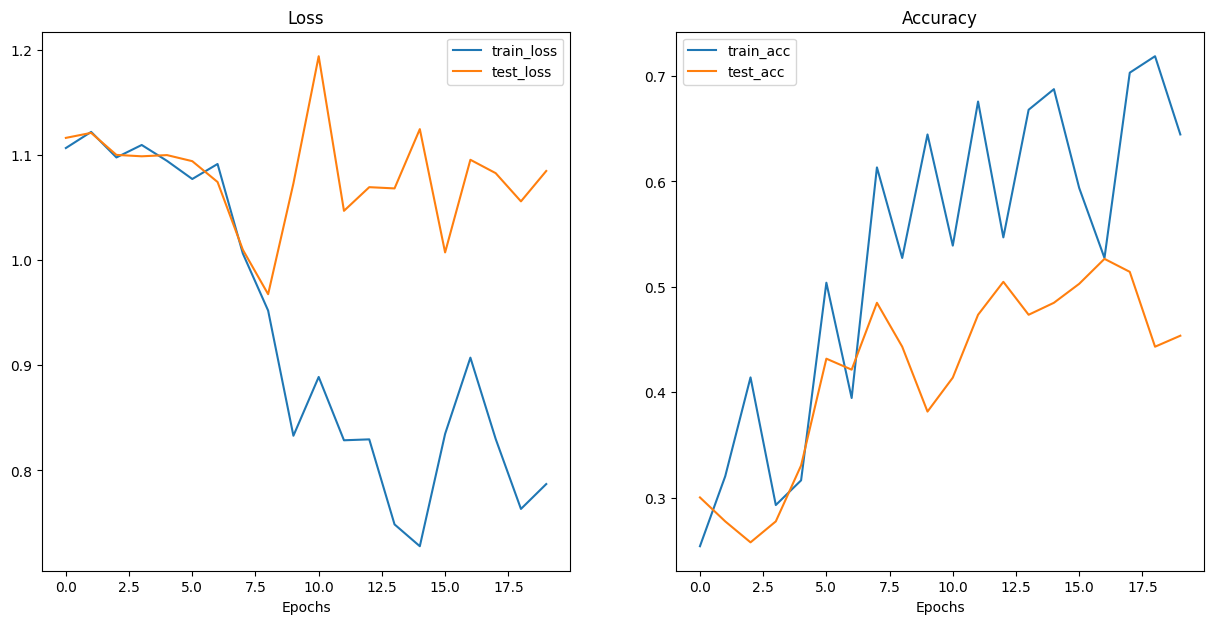

In [37]:
plot_loss_curves(model_0_resutls)

### Iteration 2. Lets try to with data augmentation.

In [38]:
train_transforms_v2 = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()
])

test_transforms_v2 = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

## Lets create pytorch Dataset and DataLoader

  0%|          | 0/20 [00:00<?, ?it/s]

epoch = 1 |train_loss = 1.1069 |train_acc = 0.2695 |test_loss = 1.1398|test_acc = 0.2604
epoch = 2 |train_loss = 1.0836 |train_acc = 0.4297 |test_loss = 1.1677|test_acc = 0.1979
epoch = 3 |train_loss = 1.1187 |train_acc = 0.2930 |test_loss = 1.1690|test_acc = 0.1979
epoch = 4 |train_loss = 1.0952 |train_acc = 0.3203 |test_loss = 1.1258|test_acc = 0.2708
epoch = 5 |train_loss = 1.0803 |train_acc = 0.4805 |test_loss = 1.1255|test_acc = 0.3021
epoch = 6 |train_loss = 1.0885 |train_acc = 0.3398 |test_loss = 1.1124|test_acc = 0.2917
epoch = 7 |train_loss = 1.0784 |train_acc = 0.4180 |test_loss = 1.0885|test_acc = 0.3731
epoch = 8 |train_loss = 1.0256 |train_acc = 0.5273 |test_loss = 0.9647|test_acc = 0.5938
epoch = 9 |train_loss = 1.0038 |train_acc = 0.4883 |test_loss = 0.9530|test_acc = 0.5540
epoch = 10 |train_loss = 1.0259 |train_acc = 0.4219 |test_loss = 0.9580|test_acc = 0.4848
epoch = 11 |train_loss = 0.9413 |train_acc = 0.5430 |test_loss = 0.9299|test_acc = 0.5028
epoch = 12 |train_l

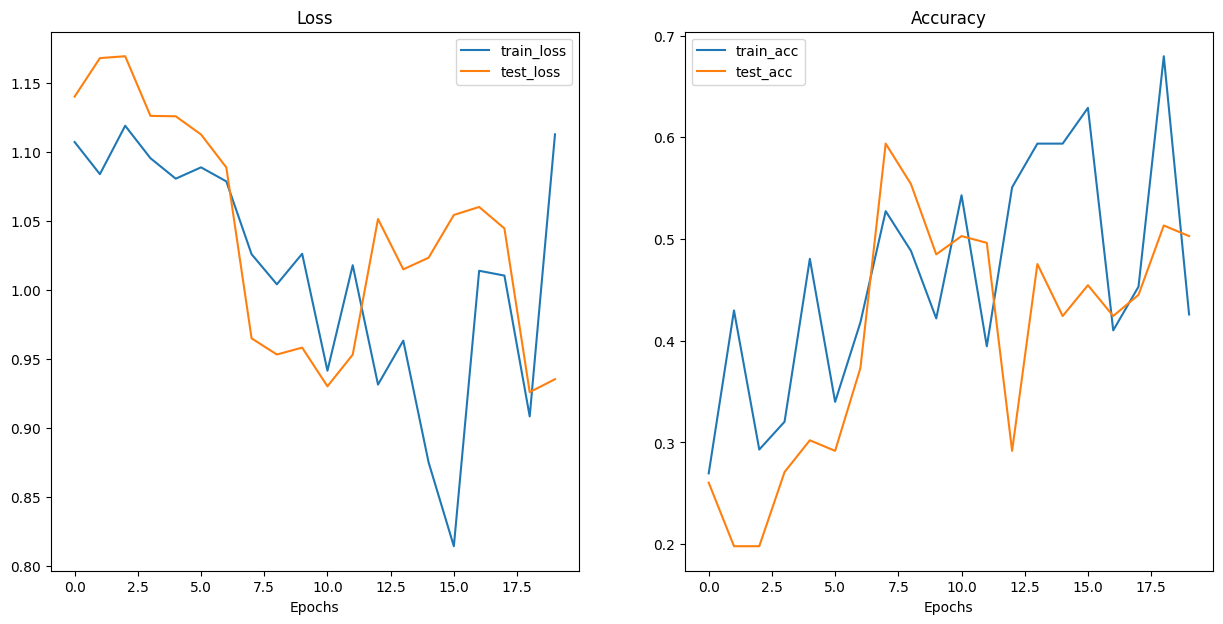

In [39]:
torch.manual_seed(MANUAL_SEED)
torch.cuda.manual_seed(MANUAL_SEED)
train_dataset_v2_transform = CustomImageFolderDataset(targ_dir=train_dir,
                                                      transform = train_transforms_v2)

test_dataset_v2_transform = CustomImageFolderDataset(targ_dir=test_dir,
                                                     transform= test_transforms_v2)


train_dataloader_v2_transform = DataLoader(dataset=train_dataset_v2_transform,
                                           batch_size=BATCH_SIZE,
                                           shuffle= True,
                                           num_workers=NUM_WORKERS)

test_dataloader_v2_transform = DataLoader(dataset=test_dataset_v2_transform,
                                          batch_size=BATCH_SIZE,
                                          shuffle= False,
                                          num_workers=NUM_WORKERS)
## Initialize a new instance of TinyVGG model,Setup loss and optimizer
model_v1 = TinyVGG(input_shape=3,
                   hidden_units=10,
                   output_shape=len(train_dataset_v2_transform.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v1.parameters(),lr=0.001)

model_v1_results = train(model=model_v1,
                         train_dataloader=train_dataloader_v2_transform,
                         test_dataloader = test_dataloader_v2_transform,
                         loss_fn=loss_fn,
                         optimizer=optimizer,
                         device=device,
                         epochs=EPOCHS)

plot_loss_curves(model_v1_results)


### Lets make prediction from custom image

Custom image shape = torch.Size([3, 296, 474])
Custom image shape = torch.uint8
Custom image device = cpu
Is tensor : True


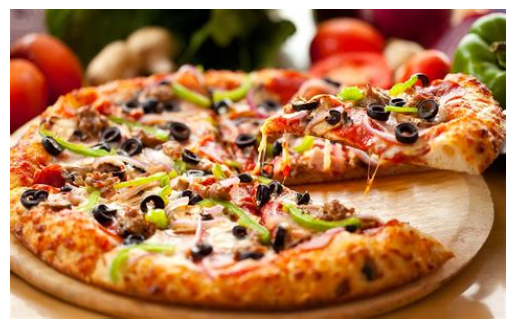

In [54]:
import torchvision

custom_img_uint8 = torchvision.io.read_image("/content/data/th-43492015.jpg")
print(f'Custom image shape = {custom_img_uint8.shape}')
print(f'Custom image shape = {custom_img_uint8.dtype}')
print(f'Custom image device = {custom_img_uint8.device}')
print(f'Is tensor : {isinstance(custom_img_uint8, torch.Tensor)}')
plt.imshow(custom_img_uint8.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.axis(False);

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Is tensor : True
Custom image shape = torch.Size([3, 64, 64])
Custom image shape = torch.float32
Custom image device = cuda:0


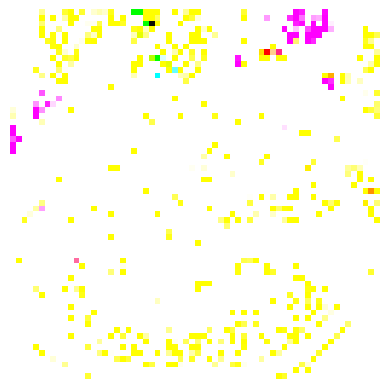

In [53]:
pred_transform = transforms.Compose([
    transforms.Resize((64,64)),
])
custom_img_float = custom_img_uint8.to(torch.float).to(device)
print(f'Is tensor : {isinstance(custom_img_float, torch.Tensor)}')
transformed_img = pred_transform(custom_img_float)
print(f'Custom image shape = {transformed_img.shape}')
print(f'Custom image shape = {transformed_img.dtype}')
print(f'Custom image device = {transformed_img.device}')

plt.imshow(transformed_img.cpu().permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.axis(False);

In [43]:
model_v1.eval()

with torch.inference_mode():
  pred = model_v1(transformed_img.unsqueeze(dim=0))

print(f'Prediction Logits: {pred}')
pred_prob = torch.softmax(pred,dim=1)
print(f'Prediction probabilities : {pred_prob}')
pred_label = torch.argmax(pred_prob,dim=1)
print(f'Prediction label : {pred_label}')
pred_class = class_names[pred_label.cpu()]
print(f'Prediction Class Name : {pred_class}')

Prediction Logits: tensor([[ -83.3011, -287.7560,   63.8869]], device='cuda:0')
Prediction probabilities : tensor([[0., 0., 1.]], device='cuda:0')
Prediction label : tensor([2], device='cuda:0')
Prediction Class Name : sushi


### Function to perform predictions and plot them

In [80]:
def plot_and_predict(img_loc: str,
                     model: nn.Module,
                     transform:torchvision.transforms):
  ## load the image 
  custom_img = torchvision.io.read_image(img_loc)
  print(f'Image Shape : {custom_img.shape}')
  print(f'Image datatype : {custom_img.dtype}')
  ## Display the image
  plt.imshow(custom_img.permute(1,2,0))
  plt.axis(False)
  print(f'Is tensor : {isinstance(custom_img, torch.Tensor)}')
  
  transformed_img = transform(custom_img).to(device)
  print(f'shape : {transformed_img.squeeze(dim=2).shape}')
  ## predict
  model.eval()

  with torch.inference_mode():
    pred = model_v1(transformed_img.squeeze(dim=2))

  print(f'Prediction Logits: {pred}')
  pred_prob = torch.softmax(pred,dim=1)
  print(f'Prediction probabilities : {pred_prob}')
  pred_label = torch.argmax(pred_prob,dim=1)
  print(f'Prediction label : {pred_label}')
  pred_class = class_names[pred_label.cpu()]
  print(f'Prediction Class Name : {pred_class}')


Image Shape : torch.Size([3, 296, 474])
Image datatype : torch.uint8
Is tensor : True
shape : torch.Size([5, 3, 64, 64])
Prediction Logits: tensor([[-0.1869, -1.0961,  0.4154],
        [-0.1869, -1.0961,  0.4154],
        [-0.1869, -1.0961,  0.4154],
        [-0.1869, -1.0961,  0.4154],
        [-0.1869, -1.0961,  0.4154]], device='cuda:0')
Prediction probabilities : tensor([[0.3097, 0.1248, 0.5656],
        [0.3097, 0.1248, 0.5656],
        [0.3097, 0.1248, 0.5656],
        [0.3097, 0.1248, 0.5656],
        [0.3097, 0.1248, 0.5656]], device='cuda:0')
Prediction label : tensor([2, 2, 2, 2, 2], device='cuda:0')


TypeError: ignored

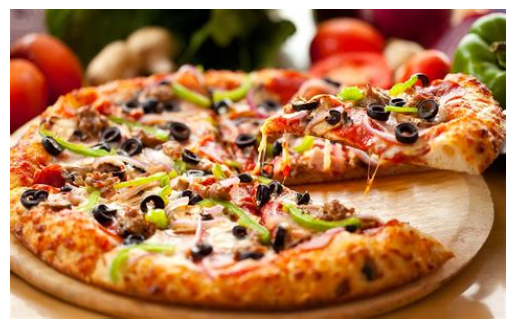

In [81]:
## perform transform
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ConvertImageDtype(torch.float),
    transforms.FiveCrop(size=64),
    transforms.Lambda(lambda crops: torch.stack([(crop) for crop in crops]))
    
])
plot_and_predict(img_loc='/content/data/th-43492015.jpg',
                 model=model_v1,
                 transform=transform)